In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
def deterministic_model_onstage(t, u0, s0, alfa, beta, gamma):
  #analytical solution of the deterministic model in the on stage
  u =  u0*np.exp(-beta*t) + (alfa/beta) * (1-np.exp(-beta*t))
  s =  s0*np.exp(-gamma*t) + (alfa/gamma) * (1-np.exp(-gamma*t)) + ((alfa-beta*u0)/(gamma-beta))*(np.exp(-gamma*t)-np.exp(-beta*t))
  return u, s

In [43]:
def stochastic_model_onstage(t, alfa, beta, gamma):
  #analytical solution of the stochastic model in the on stage
  #in the on stage of the stochastic model, u and s are poisson distributed 
  #with parameter a and b respectively

  #distribution parameters
  a = (alfa/beta) * (1-np.exp(-beta*t))
  b = (alfa/gamma)*(1-np.exp(-gamma*t))+(alfa/(gamma-beta))*(np.exp(-gamma*t)-np.exp(-beta*t))

  #distributions
  P_u = np.random.poisson(a)
  P_s = np.random.poisson(b)
  return P_u, P_s

In [44]:
def simulation(t, u0, s0, beta, gamma, alfa):

  #run deterministic and stochastic models
  u_det, s_det = deterministic_model_onstage(t, u0, s0, alfa, beta, gamma)
  u_stoch, s_stoch = stochastic_model_onstage(t, alfa, beta, gamma)

  return u_det, s_det, u_stoch, s_stoch

In [45]:
def plot_simulation(t, u_det, s_det, u_stoch, s_stoch):
  #plot u,s as a function of t
  plt.figure(figsize=(12,6))
  plt.plot(t, u_det, label='unspliced deterministic')
  plt.plot(t, s_det, label='spliced deterministic')
  plt.scatter(t, u_stoch, s=5, label='unspliced stochastic')
  plt.scatter(t, s_stoch, s=5, label='spliced stochastic')
  plt.legend()
  plt.grid(True)
  plt.title("Analytical solutions to deterministic and stochastic model")


In [46]:
def plot_phase_plane(n_simulated_data, u_det, s_det, u_stoch, s_stoch):
  #plot s as a function of u
  plt.figure(figsize=(12,6))

  plt.plot(u_det, s_det, label='on stage deterministic')
  plt.scatter(u_stoch, s_stoch, s=5, label='on stage stochastic')

  plt.legend()
  plt.grid(True)
  plt.title("Phase plane")

  


In [47]:
def main(
  u0 = 0,
  s0 = 0,
  beta = 1,
  gamma = 0.75,
  t_final = 100,
  n_simulated_data = 1000):

    #define linearly spaced time points
    t = np.linspace(0.01, t_final, n_simulated_data)
    #define periodic transcription rate alfa
    alfa = t_final + t_final * np.sin(t) * (11/12)
    
    u_det, s_det, u_stoch, s_stoch = simulation(t, u0, s0, beta, gamma, alfa)
    plot_simulation(t, u_det, s_det, u_stoch, s_stoch)
    plot_phase_plane(n_simulated_data, u_det, s_det, u_stoch, s_stoch)
  

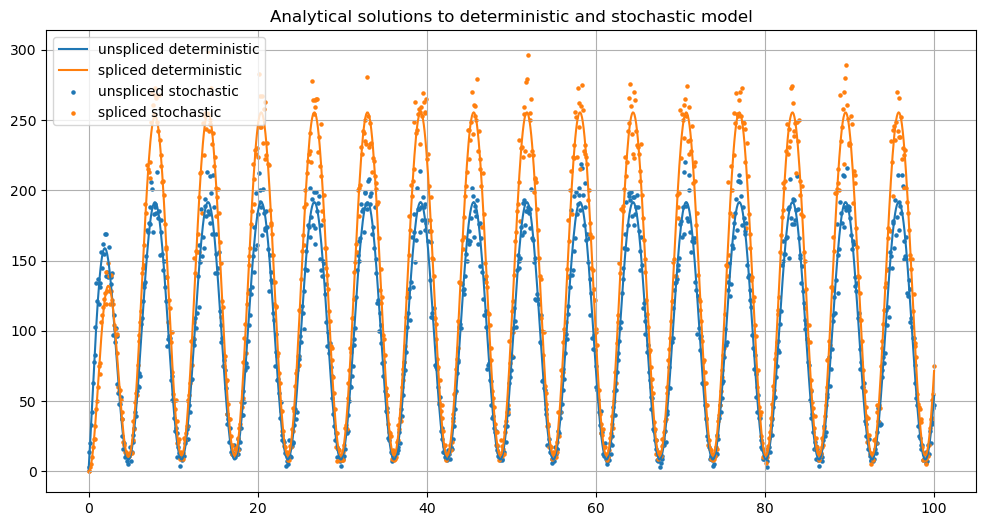

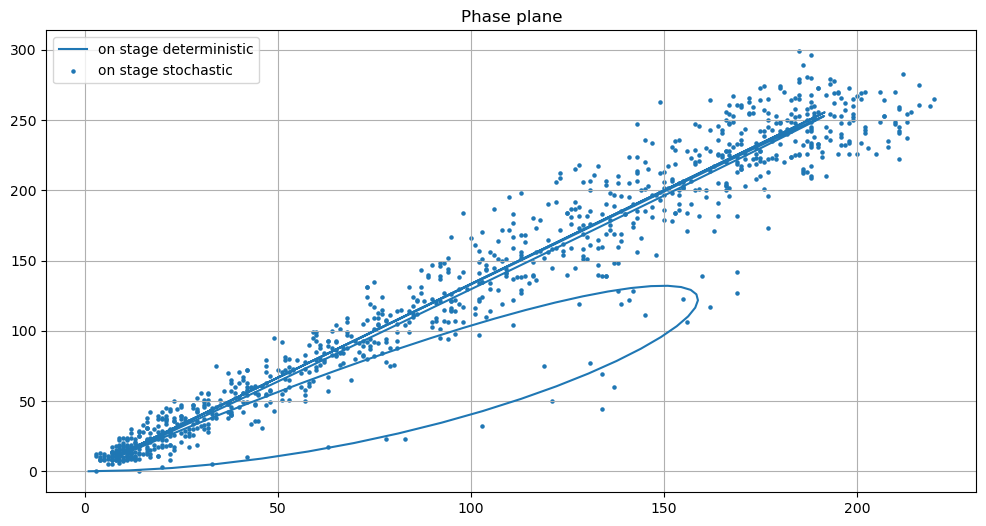

In [48]:
main()